In [4]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q -U scikit-learn matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import os
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
%matplotlib inline
plt.rcParams['figure.dpi'] = 110

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.4 MB/s eta 0:00:00


In [5]:
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target
print("Shape:", wine_df.shape)
display(wine_df.head())
display(wine_df.describe().T)


Shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       17

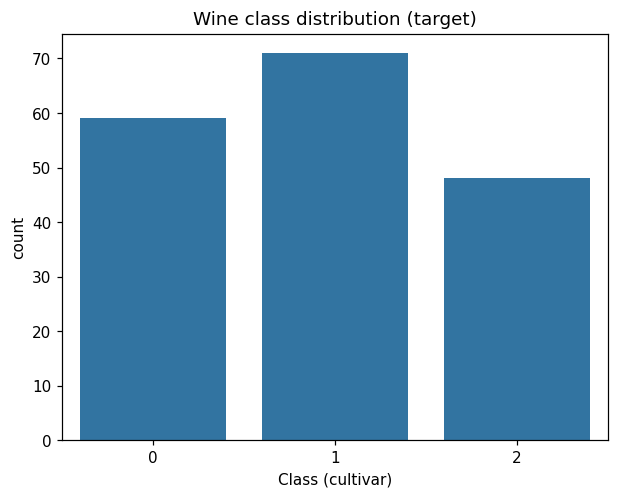

In [6]:
print("Data types and non-null counts:")
print(wine_df.info())

print("\nClass distribution (target counts):")
print(wine_df['target'].value_counts())
sns.countplot(x='target', data=wine_df)
plt.title('Wine class distribution (target)')
plt.xlabel('Class (cultivar)')
plt.show()

target,0,1,2
alcohol,,,
11.03,0,1,0
11.41,0,1,0
11.45,0,1,0
11.46,0,1,0
11.56,0,1,0
...,...,...,...
14.37,1,0,0
14.38,2,0,0
14.39,1,0,0


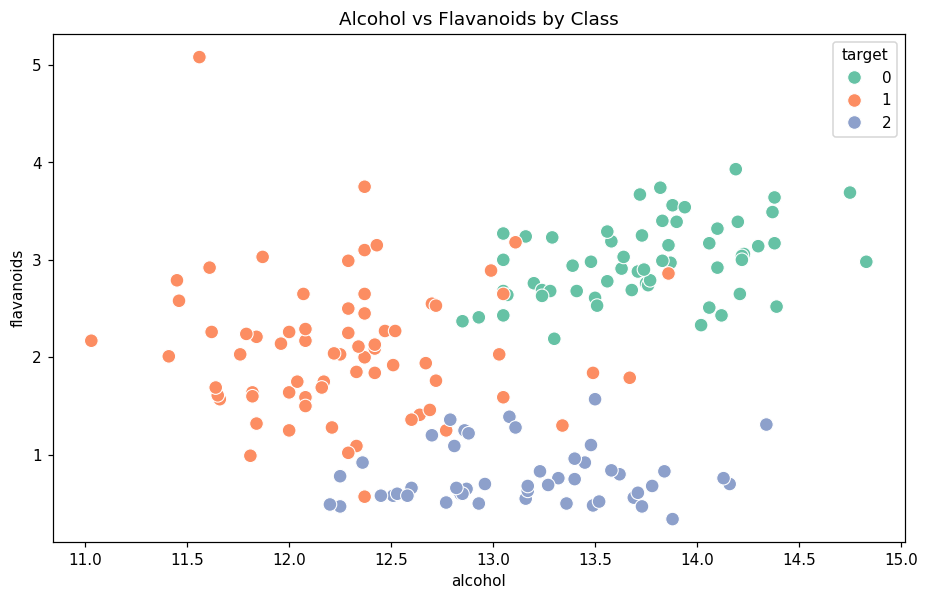

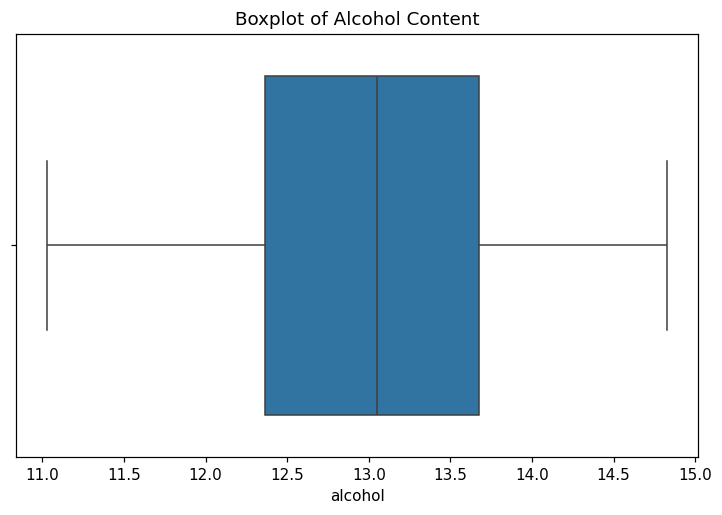

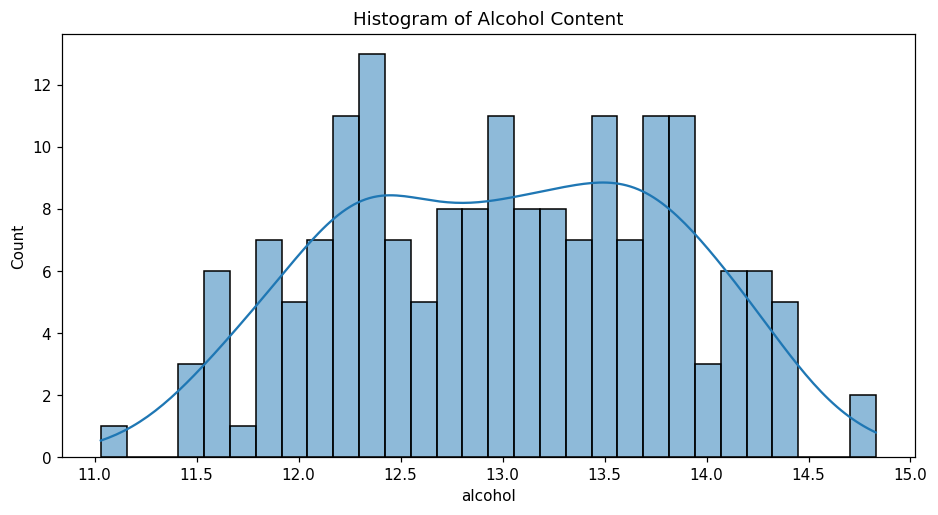

T-test (two-sided) p-value: 5.926412330452344e-34


In [7]:
alcohol_table = pd.crosstab(wine_df['alcohol'], wine_df['target'])
display(alcohol_table)

plt.figure(figsize=(10,6))
sns.scatterplot(x='alcohol', y='flavanoids', hue='target', data=wine_df, palette='Set2', s=80)
plt.title('Alcohol vs Flavanoids by Class')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='alcohol', data=wine_df)
plt.title('Boxplot of Alcohol Content')
plt.show()


plt.figure(figsize=(10,5))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Histogram of Alcohol Content')
plt.show()

from scipy.stats import ttest_ind
class_0_alcohol = wine_df.loc[wine_df['target']==0, 'alcohol']
class_1_alcohol = wine_df.loc[wine_df['target']==1, 'alcohol']
t_stat, p_value = ttest_ind(class_0_alcohol, class_1_alcohol, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

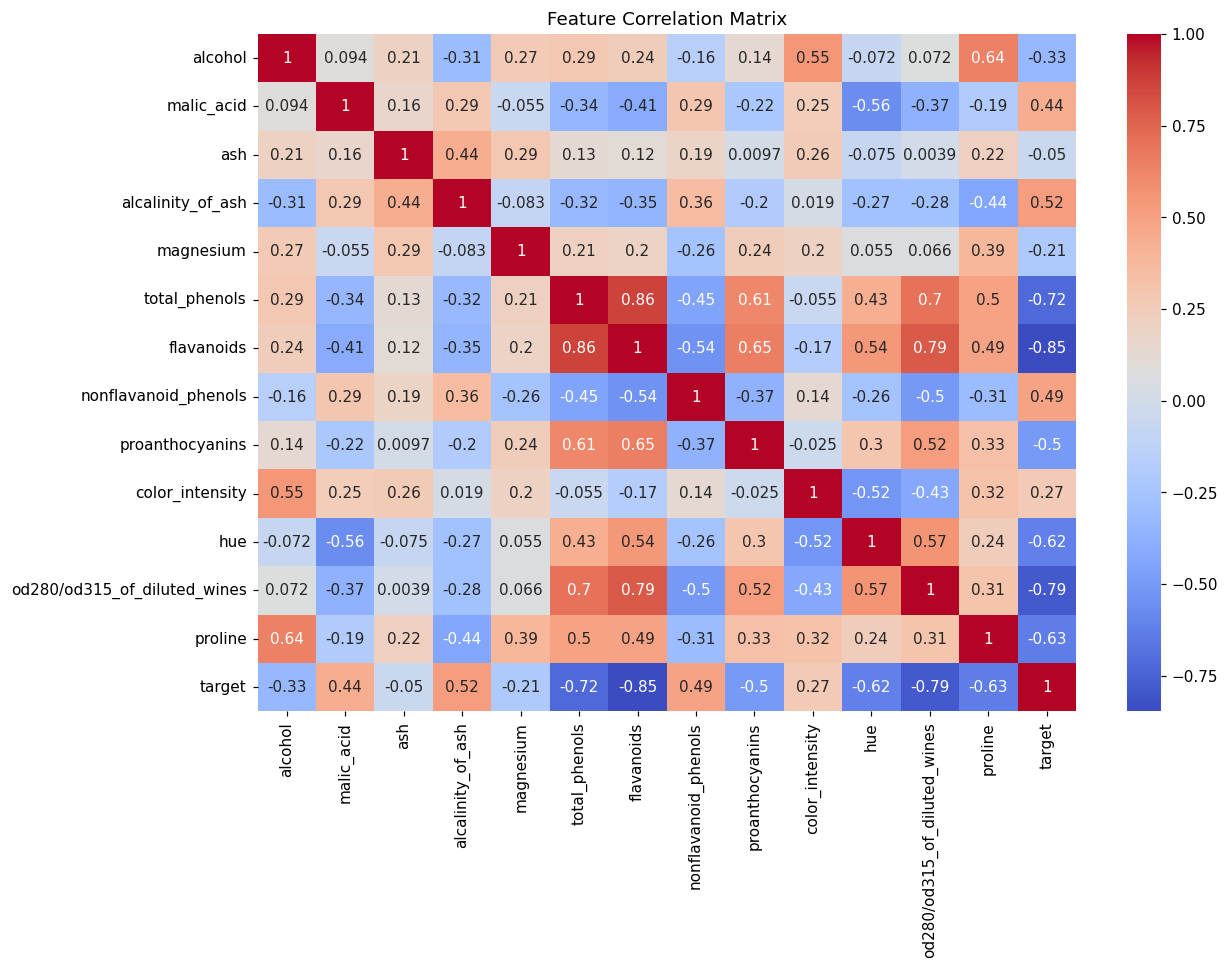

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

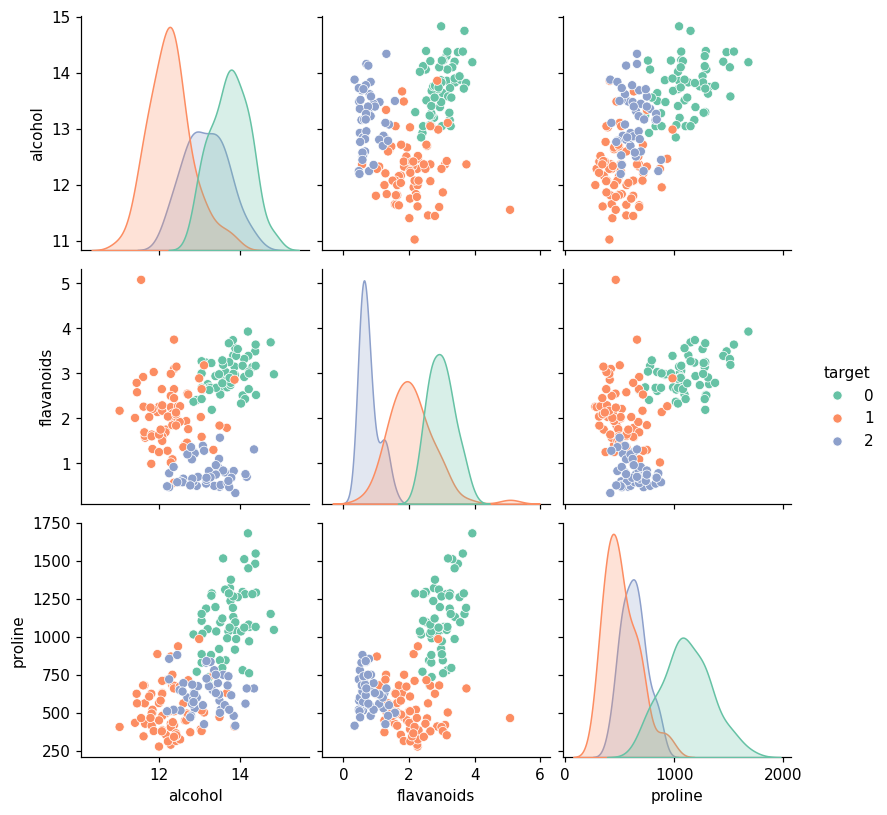

In [9]:
sns.pairplot(wine_df, vars=['alcohol','flavanoids','proline'], hue='target', palette='Set2')
plt.show()

In [10]:
X = wine_df[data.feature_names]
y = wine_df['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, train_size=0.7, random_state=42, stratify=y
)
print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)

Train shape: (124, 13) Test shape: (54, 13)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, lr_preds))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_test_scaled)
print("Decision Tree:\n", classification_report(y_test, dt_preds))

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)
print("SVM:\n", classification_report(y_test, svm_preds))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.

In [13]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression tuning
lr_params = {'C':[0.01,0.1,1,10],'solver':['lbfgs','liblinear'],'penalty':['l2']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=2000), lr_params, cv=5, n_jobs=-1, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)
print("Best LR Params:", lr_grid.best_params_)

# Decision Tree tuning
dt_params = {'max_depth':[2,4,6,8,None],'min_samples_split':[2,4,8],'criterion':['gini','entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)
print("Best DT Params:", dt_grid.best_params_)

# SVM tuning
svm_params = {'C':[0.1,1,10,50],'gamma':['scale',0.01,0.001],'kernel':['rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
print("Best SVM Params:", svm_grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1208, in fit
    raise ValueError(
Valu

Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best DT Params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 8}
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [14]:
best_models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Decision Tree': dt_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_
}

for name, model in best_models.items():
    preds = model.predict(X_test_scaled)
    print(f"=== {name} ===")
    print(classification_report(y_test, preds))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.90      0.86      0.88        21
           2       0.88      1.00      0.94        15

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54

=== SVM ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2 

In [19]:
import pickle

# Save the model
with open('best_svm.pkl', 'wb') as f:
    pickle.dump(best_models['SVM'], f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [20]:
from google.colab import files
files.download("scaler.pkl")
files.download("best_svm.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>